In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
import geopandas as gpd


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

### 1
Which of the following (select all that apply) is true for the binary classification confusion matrix report:
* a) it reports sizes of each cluster and number of the clusters;
* b) it is a square matrix;
* c) it is symmetrical;
* d) it has dimensions $2\times2$;
* e) it has dimensions $3\times3$;
* f) it reports the quality of classification fit over the test set;
* g) it reports the percentage of correctly classified datapoints over the test set;
* h) it reports the percentage of incorrectly classified datapoints over the test set;

### bdfg

### 2
Given the following synthetic data and the plotting function provided for you, you are to implement two classification models: Logistic Regression and SVC.

a. Partition the data into training and testing sets of equal size.

b. Create a logistic regression model with C=10000 and fit the model with the training data

c. Report the coefficients and intercept of the fitted model (consult the API documentation for these statistics)

d. Use the plot_decision_regions function to plot the test data and the classifier

e. Construct the confusion matrix such that you can report TP, FP, TN, and FN. Using those four values, report the accuracy, precision, and recall of your predictions from the logistic regression model

f. Create a support vector classifier with C=10000 and a linear kernel. Fit the model with the training data.

g. Use the plot_decision_regions function to plot the test data and the classifier

h. Construct the confusion matrix such that you can report TP, FP, TN, and FN. Using those four values, report the accuracy, precision, and recall of your predictions from the support vector classifier

In [49]:
np.random.seed(2018)
X, y = make_classification(n_features=2, n_samples=1500, n_classes=2, class_sep=2, n_redundant=0, random_state=0)

In [50]:
# Used for plotting decision regions
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=colors[idx],
                    marker=markers[idx], label=cl,
                    edgecolor='black')
    
    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]
        
        plt.scatter(X_test[:, 0], X_test[:, 1],
                    c='', edgecolor='black', alpha=1.0,
                    linewidth=1, marker='o',
                    s=100, label='Test Set')

### (a) Split the data into training and testing

In [51]:
# 50% train, 50% test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5, random_state=2018)

### (b) Create logistic regression model with C = 10000 to disable regularization and fit training data to it

In [5]:
#learn logistic regression over the training sample; higher C == no regularization
logit = LogisticRegression(C = 10000)
logit.fit(X_train,y_train)



LogisticRegression(C=10000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

### (c) Report coefficients and intercept from fitted model

In [6]:
logit.coef_

array([[ 3.58557988, -0.20217707]])

In [7]:
# coefficients
coef = logit.coef_
intercept = logit.intercept_
print('coefficients are:', coef)
print('intercept is', intercept)

coefficients are: [[ 3.58557988 -0.20217707]]
intercept is [-0.95191683]


### (d) Use the function plot_decision_regions to plot the test data with the logistic regression classifier

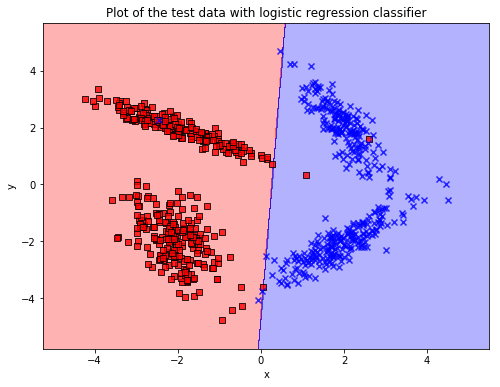

In [8]:
# plot the test data
fig = plt.subplots(figsize = (8,6))
fig = plot_decision_regions(X_test, y_test, logit)
plt.xlabel("x")
plt.ylabel("y")
plt.title('Plot of the test data with logistic regression classifier')
plt.show()

Fig 1. This is a scatter plot of the test data of a random dataset, with the logistic regression classifier

### (e) Construct the confusion matrix and report the model's accuracy, precision, and recall on the test data for the logistic regression classifier

In [9]:
#add labels
labelPred = logit.predict(X_test)
labelActual = y_test

# confusion matrix & report
#compute TP,FP,FN,TN for the above classification
TP = sum((labelPred==1)&(labelActual==1))
FP = sum((labelPred==1)&(labelActual==0))
FN = sum((labelPred==0)&(labelActual==1))
TN = sum((labelPred==0)&(labelActual==0))

#compute precision, accuracy and recall
Acc = 100.0 * (TP+TN)/(TP+TN+FP+FN)
Rec = 100.0 * TP/(TP+FN)
Prec= 100.0 * TP/(TP+FP)
print('Precision = %.2f%%\nAccuracy = %.2f%%\nRecall = %.2f%%'%(Prec,Acc,Rec))



Precision = 99.46%
Accuracy = 99.07%
Recall = 98.66%


In [10]:
def print_confusion_matrix(predictions, labels):
    # Function for printing Confusion matrix, based on labels and predictions
    ls = list(confusion_matrix(predictions, labels)) ## returns tn, fp, fn, tp
    ls = pd.DataFrame(ls, columns = ['Predicted Negative', 'Predicted Positive'], index=['Actual Negative', 'Actual Positive'])
    print ("Confusion Matrix:\n", ls)
    
print_confusion_matrix(labelPred, labelActual)

Confusion Matrix:
                  Predicted Negative  Predicted Positive
Actual Negative                 373                   5
Actual Positive                   2                 369


### (f) Create a support vector classifier with C = 10000 and kernel = linear and train it on the training data

In [11]:
# support vector classifier with C = 10000, kernel = linear
svmodel = SVC(kernel='linear', C = 10000)
svmodel.fit(X_train, y_train)

SVC(C=10000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

### (g) Use the function plot_decision_regions to plot the test data with the support vector classifier

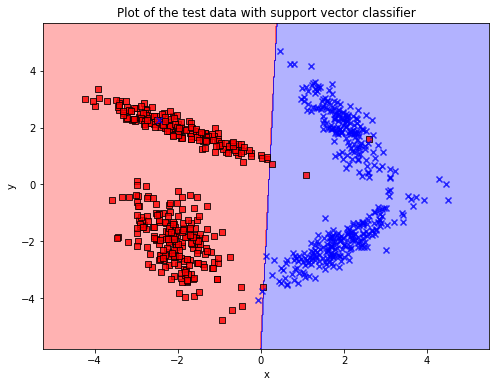

In [12]:
# plot the test data
fig = plt.subplots(figsize = (8,6))
fig = plot_decision_regions(X_test, y_test, svmodel)
plt.xlabel("x")
plt.ylabel("y")
plt.title('Plot of the test data with support vector classifier')
plt.show()

Figure 2. This is a scatter plot of the test data, with support vector classifier

### (h) Construct the confusion matrix and report the model's accuracy, precision, and recall on the test data for the support vector classifier

In [13]:
#add labels
labelPred = svmodel.predict(X_test)
labelActual = y_test

# confusion matrix & report
#compute TP,FP,FN,TN for the above classification
TP = sum((labelPred==1)&(labelActual==1))
FP = sum((labelPred==1)&(labelActual==0))
FN = sum((labelPred==0)&(labelActual==1))
TN = sum((labelPred==0)&(labelActual==0))

#compute precision, accuracy and recall
Acc = 100.0 * (TP+TN)/(TP+TN+FP+FN)
Rec = 100.0 * TP/(TP+FN)
Prec= 100.0 * TP/(TP+FP)
print('Precision = %.2f%%\nAccuracy = %.2f%%\nRecall = %.2f%%'%(Prec,Acc,Rec))




Precision = 99.20%
Accuracy = 99.20%
Recall = 99.20%


In [14]:

print_confusion_matrix(labelPred, labelActual)

Confusion Matrix:
                  Predicted Negative  Predicted Positive
Actual Negative                 372                   3
Actual Positive                   3                 371


## 3

Given the countries dataset, we're going to engage in a rather interesting classification exercise. What we will try to do is classify whether a certain region is in Asia. Therefore, our target value will be the region masked as a binary integer: 0 or 1. 

***1 will denote that the region is in Asia. 0 will denote otherwise.***

You are tasked with preprocessing the data such that it's in a consumable format for the machine learning algorithm. You will then implement these models and do analysis on them.. Then you are to plot the data on the world map similar to previous assignments to show how accurate your classification model is.

In [15]:
countries = pd.read_csv('countries.csv')
countries['COUNTRY'] = countries['COUNTRY'].str.strip()
countries = countries.dropna()

world = gpd.read_file('World_Countries.shp')
world['COUNTRY'] = world['COUNTRY'].str.strip()

In [16]:
countries.head()

,COUNTRY,Region,Population,Area_sqmi,Pop_Density,Coastline_area_ratio,Net_migration,InfantMortality_per1000,GDP_percapita,Literacy_percent,Phones_per_1000,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
6,Anguilla,LATIN AMER. & CARIB,13477,102,132.1,59.80,10.76,21.03,8600.0,95.0,460.0,0.00,0.00,100.00,2.0,14.17,5.34,0.040,0.180,0.780
7,Antigua & Barbuda,LATIN AMER. & CARIB,69108,443,156.0,34.54,-6.15,19.46,11000.0,89.0,549.9,18.18,4.55,77.27,2.0,16.93,5.37,0.038,0.220,0.743


In [17]:
world.head()

,COUNTRY,geometry
0,Aruba (Netherlands),POLYGON ((-69.88223266601562 12.41110992431641...
1,Antigua and Barbuda,(POLYGON ((-61.7388916015625 17.54055404663086...
2,Afghanistan,"POLYGON ((61.27655792236328 35.60724639892578,..."
3,Algeria,POLYGON ((-5.152134895324707 30.18046951293945...
4,Azerbaijan,(POLYGON ((46.54037475585938 38.87558746337891...


In [19]:
world.shape

(252, 2)

In [20]:
world = world.merge(countries)

### (a) Create a function region_to_binary which transforms the Region column to a binary value based on whether the region is in Asia or not.

In [21]:
def region_to_binary(row):
    # implement this function
    if row['Region'] == "ASIA (EX. NEAR EAST)         ":
        row['Region'] = 1
    else: 
        row['Region'] = 0
        
    return row

binary_countries = countries.apply(region_to_binary, axis=1)
binary_countries.drop(columns=['COUNTRY'], axis=1, inplace=True)
binary_countries.dropna(inplace=True)

binary_world = world.apply(region_to_binary, axis=1)

In [22]:
binary_world.shape

(146, 21)

In [23]:
binary_countries.shape

(179, 19)

In [24]:
binary_countries.head()

,Region,Population,Area_sqmi,Pop_Density,Coastline_area_ratio,Net_migration,InfantMortality_per1000,GDP_percapita,Literacy_percent,Phones_per_1000,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,1,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,0,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,0,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
6,0,13477,102,132.1,59.80,10.76,21.03,8600.0,95.0,460.0,0.00,0.00,100.00,2.0,14.17,5.34,0.040,0.180,0.780
7,0,69108,443,156.0,34.54,-6.15,19.46,11000.0,89.0,549.9,18.18,4.55,77.27,2.0,16.93,5.37,0.038,0.220,0.743


### (b) Split features into feature and target. In this case, target is the Region column. Afterwards, split the data into training and test set (let test_size=0.2).

In [25]:
binary_countries.head()

,Region,Population,Area_sqmi,Pop_Density,Coastline_area_ratio,Net_migration,InfantMortality_per1000,GDP_percapita,Literacy_percent,Phones_per_1000,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,1,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,0,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,0,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
6,0,13477,102,132.1,59.80,10.76,21.03,8600.0,95.0,460.0,0.00,0.00,100.00,2.0,14.17,5.34,0.040,0.180,0.780
7,0,69108,443,156.0,34.54,-6.15,19.46,11000.0,89.0,549.9,18.18,4.55,77.27,2.0,16.93,5.37,0.038,0.220,0.743


In [26]:
# write code here
# target: Region column; x
# feature: others; y 
# target = binary_countries.iloc[:,0]
# feature = binary_countries.iloc[:,1:]


train, test = train_test_split(binary_countries,test_size=0.2)
X_train = train.values[:,1:]
X_test = test.values[:,1:]
y_train = train.values[:,0]
y_test = test.values[:,0]


### (c) Implement a logistic regression model and train it on the training data

In [27]:
#learn logistic regression over the training sample; higher C == no regularization
logit = LogisticRegression(C = 10000)
logit.fit(X_train,y_train)


LogisticRegression(C=10000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

### (d) Construct the confusion matrix and report the logistic regression model's accuracy, precision, and recall on the test data 

In [28]:
# Construct the confusion matrix and report 
labelPred = logit.predict(X_test)
labelActual = y_test

# confusion matrix & report
#compute TP,FP,FN,TN for the above classification
TP = sum((labelPred==1)&(labelActual==1))
FP = sum((labelPred==1)&(labelActual==0))
FN = sum((labelPred==0)&(labelActual==1))
TN = sum((labelPred==0)&(labelActual==0))

#compute precision, accuracy and recall
Acc = 100.0 * (TP+TN)/(TP+TN+FP+FN)
Rec = 100.0 * TP/(TP+FN)
Prec= 100.0 * TP/(TP+FP)
print('Precision = %.2f%%\nAccuracy = %.2f%%\nRecall = %.2f%%'%(Prec,Acc,Rec))



Precision = 100.00%
Accuracy = 88.89%
Recall = 42.86%


In [29]:
print_confusion_matrix(labelPred, labelActual)

Confusion Matrix:
                  Predicted Negative  Predicted Positive
Actual Negative                  29                   4
Actual Positive                   0                   3


### (e) Plot the predictions from the logistic regression model on the world map to show how accurate you were in predicting the correct regions.

In [30]:
binary_world.head()

,COUNTRY,geometry,Region,Population,Area_sqmi,Pop_Density,Coastline_area_ratio,Net_migration,InfantMortality_per1000,GDP_percapita,...,Phones_per_1000,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,"POLYGON ((61.27655792236328 35.60724639892578,...",1,31056997,647500,48.0,0.00,23.06,163.07,700.0,...,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Algeria,POLYGON ((-5.152134895324707 30.18046951293945...,0,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,...,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
2,Azerbaijan,(POLYGON ((46.54037475585938 38.87558746337891...,0,7961619,86600,91.9,0.00,-4.90,81.74,3400.0,...,137.1,19.63,2.71,77.66,1.0,20.74,9.75,0.141,0.457,0.402
3,Albania,"POLYGON ((20.79192352294922 40.43154144287109,...",0,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,...,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
4,Armenia,(POLYGON ((46.54037475585938 38.87558746337891...,0,2976372,29800,99.9,0.00,-6.47,23.28,3500.0,...,195.7,17.55,2.30,80.15,4.0,12.07,8.23,0.239,0.343,0.418


In [31]:
target = binary_world.values[:,2]
feature = binary_world.values[:,3:]

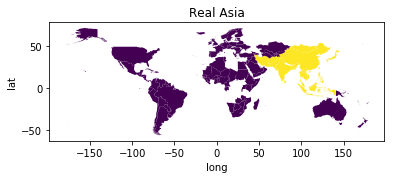

In [32]:
binary_world.plot('Region')
plt.xlabel("long")
plt.ylabel("lat")
plt.title('Real Asia')
plt.show()



Figure 3. This is a map highlights the Asia countries. 

In [33]:
label_pred = logit.predict(feature)
binary_world['label_pred'] = label_pred.astype(int)

In [34]:
binary_world.head()

,COUNTRY,geometry,Region,Population,Area_sqmi,Pop_Density,Coastline_area_ratio,Net_migration,InfantMortality_per1000,GDP_percapita,...,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service,label_pred
0,Afghanistan,"POLYGON ((61.27655792236328 35.60724639892578,...",1,31056997,647500,48.0,0.00,23.06,163.07,700.0,...,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380,0
1,Algeria,POLYGON ((-5.152134895324707 30.18046951293945...,0,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,...,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298,0
2,Azerbaijan,(POLYGON ((46.54037475585938 38.87558746337891...,0,7961619,86600,91.9,0.00,-4.90,81.74,3400.0,...,19.63,2.71,77.66,1.0,20.74,9.75,0.141,0.457,0.402,0
3,Albania,"POLYGON ((20.79192352294922 40.43154144287109,...",0,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,...,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579,0
4,Armenia,(POLYGON ((46.54037475585938 38.87558746337891...,0,2976372,29800,99.9,0.00,-6.47,23.28,3500.0,...,17.55,2.30,80.15,4.0,12.07,8.23,0.239,0.343,0.418,0


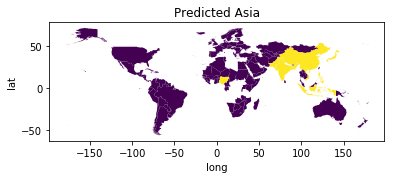

In [35]:
binary_world.plot('label_pred')

plt.xlabel("long")
plt.ylabel("lat")
plt.title('Predicted Asia')
plt.show()

Figure 4. This is a predicted map of "Asian countries" with logistic regression model

### (f) Implement a support vector classifier and train it on the training data

In [36]:
# support vector classifier with C = 10000
svmodel = SVC(kernel = 'rbf', C = 10000)
svmodel.fit(X_train, y_train)

SVC(C=10000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

### (g) Construct the confusion matrix and report the SVC's accuracy, precision, and recall on the test data

In [40]:
labelPred = svmodel.predict(X_test)
labelActual = y_test

In [41]:
#compute TP,FP,FN,TN for the above classification
TP = sum((labelPred==1)&(labelActual==1))
FP = sum((labelPred==1)&(labelActual==0))
FN = sum((labelPred==0)&(labelActual==1))
TN = sum((labelPred==0)&(labelActual==0))

#compute precision, accuracy and recall
Acc = 100.0 * (TP+TN)/(TP+TN+FP+FN)
Rec = 100.0 * TP/(TP+FN)
Prec= 100.0 * TP/(TP+FP)
print('Precision = %.2f%%\nAccuracy = %.2f%%\nRecall = %.2f%%'%(Prec,Acc,Rec))

Precision = nan%
Accuracy = 80.56%
Recall = 0.00%


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


In [43]:
print_confusion_matrix(labelPred, labelActual)

Confusion Matrix:
                  Predicted Negative  Predicted Positive
Actual Negative                  29                   7
Actual Positive                   0                   0


### (h) Plot the predictions from the support vector classifier on the world map to show how accurate you were in predicting the correct regions.

In [46]:
label_pred_svc = svmodel.predict(feature)
binary_world['label_pred_svc'] = label_pred_svc.astype(int)

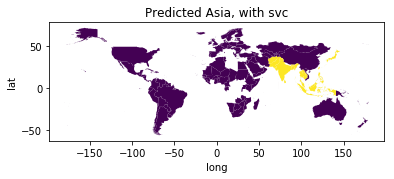

In [47]:
binary_world.plot('label_pred_svc')

plt.xlabel("long")
plt.ylabel("lat")
plt.title('Predicted Asia, with svc')
plt.show()

Figure 5. This is a predicted map of "Asian countries" with svc